<h1>Task 1 – Problem Formulation, Data Acquisition and Preparation</h1>

<h3>1.1 Data Acquisition</h3>

<h4>Data resource:</h4>
<p>
"Estimation of obesity levels based on eating habits and physical condition Data Set": https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#</p>

<h3>1.1.1 data checking</h3>
<p>Take a genenral look at the dataset.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataframe from the xls file
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
#Printing the first five rows of the dataframe for visualization
print(df.head(3))

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   

                  MTRANS     NObeyesdad  
0  Public_Transportation  Normal_Weight  
1  Public_Transportation  Normal_Weight  
2  Public_Transportation  Normal_Weight  


In [4]:
print(df.shape)

(2111, 17)


In [5]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [7]:
#checking if there is any missing value
df.isnull().any().sum() # no missing value is found

0

In [8]:
#checking if there are duplicated attributes in the dataset
print(df.duplicated().sum()) # 24 duplicates are found

24


In [9]:
#checking the details of duplicates
print(df.duplicated()) # 24 duplicates are found

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool


<h3>1.1.2 Replacing the column names</h3>
<p>To improve the data readability, replacing the abbreviated column names in the dataset with the meaningful full names found in the paper in the following link:</p>
<p>https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub</p>
<p><strong>Attribute Information(apart from Gender, Age, Height and Weight variables):</strong></p>
<p>Frequent consumption of high caloric food (FAVC)</p>
<p>Frequency of consumption of vegetables (FCVC)</p>
<p>Number of main meals (NCP)</p>
<p>Consumption of food between meals (CAEC)</p>
<p>Consumption of water daily (CH20)</p>
<p>Consumption of alcohol (CALC)</p>
<p>Calories consumption monitoring (SCC)</p>
<p>Physical activity frequency (FAF)</p>
<p>Time using technology devices (TUE)</p>
<p>Transportation used (MTRANS)</p>

In [10]:
#replacing the abbreviated column names to ensure the better readability
df.rename(columns = {"FAVC":"Frequent_consumption_of_high_caloric_food","FCVC":"Frequency_of_consumption_of_vegetables","NCP":"Number_of_main_meals","CAEC":"Consumption_of_food_between_meals","CH2O":"Consumption_of_water_daily","SCC":"Calories_consumption_monitoring","FAF":"Physical_activity_frequency","TUE":"Time_using_technology_devices","CALC":"Consumption_of_alcohol","MTRANS":"Transportation_used"}, inplace = True)

In [11]:
#check the columns after replacement
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   family_history_with_overweight             2111 non-null   object 
 5   Frequent_consumption_of_high_caloric_food  2111 non-null   object 
 6   Frequency_of_consumption_of_vegetables     2111 non-null   float64
 7   Number_of_main_meals                       2111 non-null   float64
 8   Consumption_of_food_between_meals          2111 non-null   object 
 9   SMOKE                                      2111 non-null   object 
 10  Consumption_of_water_dai

In [12]:
#Checking categorical variables in rows-string
print(df.describe(include = [object]))

       Gender family_history_with_overweight  \
count    2111                           2111   
unique      2                              2   
top      Male                            yes   
freq     1068                           1726   

       Frequent_consumption_of_high_caloric_food  \
count                                       2111   
unique                                         2   
top                                          yes   
freq                                        1866   

       Consumption_of_food_between_meals SMOKE  \
count                               2111  2111   
unique                                 4     2   
top                            Sometimes    no   
freq                                1765  2067   

       Calories_consumption_monitoring Consumption_of_alcohol  \
count                             2111                   2111   
unique                               2                      4   
top                                 no              

In [13]:
#Checking numerial variables in rows-string
print(df.describe(include = [np.number])) 

               Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058   
std       6.345968     0.093305    26.191172   
min      14.000000     1.450000    39.000000   
25%      19.947192     1.630000    65.473343   
50%      22.777890     1.700499    83.000000   
75%      26.000000     1.768464   107.430682   
max      61.000000     1.980000   173.000000   

       Frequency_of_consumption_of_vegetables  Number_of_main_meals  \
count                             2111.000000           2111.000000   
mean                                 2.419043              2.685628   
std                                  0.533927              0.778039   
min                                  1.000000              1.000000   
25%                                  2.000000              2.658738   
50%                                  2.385502              3.000000   
75%                                  3.000000              3.000000   

<h1>Task 2 – Data Exploration</h1>

<h3>2.1 Exploring each column by using appropriate descriptive statistics and/or graphical visualisations.</h3>

In [14]:
#based on the requirement of assignment2, choosing 10 columns out of 17
df_ex = df[["Gender","Age","Height","Weight","family_history_with_overweight","Consumption_of_food_between_meals","SMOKE","Physical_activity_frequency","Consumption_of_alcohol","NObeyesdad"]]

In [15]:
#check the columns in the dataset for exploaration analysis
print(df_ex.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2111 non-null   object 
 1   Age                                2111 non-null   float64
 2   Height                             2111 non-null   float64
 3   Weight                             2111 non-null   float64
 4   family_history_with_overweight     2111 non-null   object 
 5   Consumption_of_food_between_meals  2111 non-null   object 
 6   SMOKE                              2111 non-null   object 
 7   Physical_activity_frequency        2111 non-null   float64
 8   Consumption_of_alcohol             2111 non-null   object 
 9   NObeyesdad                         2111 non-null   object 
dtypes: float64(4), object(6)
memory usage: 165.0+ KB
None


In [16]:
print(df_ex.head(3))

   Gender   Age  Height  Weight family_history_with_overweight  \
0  Female  21.0    1.62    64.0                            yes   
1  Female  21.0    1.52    56.0                            yes   
2    Male  23.0    1.80    77.0                            yes   

  Consumption_of_food_between_meals SMOKE  Physical_activity_frequency  \
0                         Sometimes    no                          0.0   
1                         Sometimes   yes                          3.0   
2                         Sometimes    no                          2.0   

  Consumption_of_alcohol     NObeyesdad  
0                     no  Normal_Weight  
1              Sometimes  Normal_Weight  
2             Frequently  Normal_Weight  


In [17]:
#Checking categorical variables in rows-string
print(df_ex.describe(include = [object]))

       Gender family_history_with_overweight  \
count    2111                           2111   
unique      2                              2   
top      Male                            yes   
freq     1068                           1726   

       Consumption_of_food_between_meals SMOKE Consumption_of_alcohol  \
count                               2111  2111                   2111   
unique                                 4     2                      4   
top                            Sometimes    no              Sometimes   
freq                                1765  2067                   1401   

            NObeyesdad  
count             2111  
unique               7  
top     Obesity_Type_I  
freq               351  


In [18]:
df_ex["Gender"].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [19]:
df_ex["family_history_with_overweight"].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

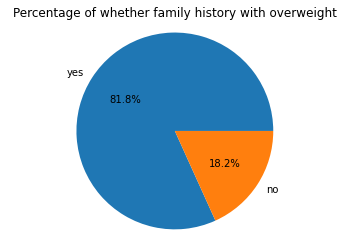

In [20]:
#visualizing the distribution of whether family history with overweight
label = ["yes", "no"]
 
plt.pie(df_ex["family_history_with_overweight"].value_counts(), labels=label, autopct='%1.1f%%', explode=[0,0])
plt.title("Percentage of whether family history with overweight")
plt.axis('equal')
plt.show()

In [21]:
df_ex["Consumption_of_food_between_meals"].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: Consumption_of_food_between_meals, dtype: int64

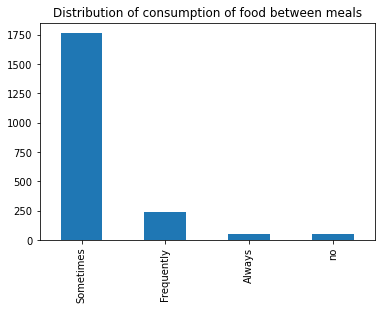

In [22]:
#visualizing the distribution of Consumption of food between meals
df_ex["Consumption_of_food_between_meals"].value_counts().plot(kind='bar', title='Distribution of consumption of food between meals')
plt.show()

In [23]:
df_ex["SMOKE"].value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

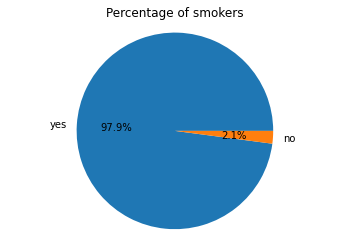

In [24]:
#visualizing the distribution of smokers
label = ["yes", "no"]
 
plt.pie(df_ex["SMOKE"].value_counts(), labels=label, autopct='%1.1f%%', explode=[0,0])
plt.title("Percentage of smokers")
plt.axis('equal')
plt.show()

In [25]:
df_ex["Consumption_of_alcohol"].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: Consumption_of_alcohol, dtype: int64

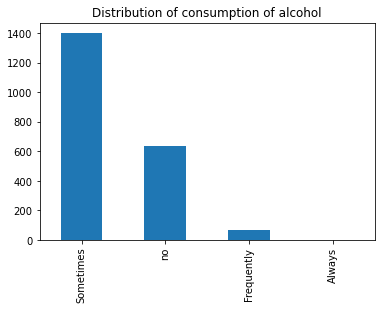

In [26]:
#visualizing the distribution of Consumption of food between meals
df_ex["Consumption_of_alcohol"].value_counts().plot(kind='bar', title='Distribution of consumption of alcohol')
plt.show()

In [27]:
df_ex["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

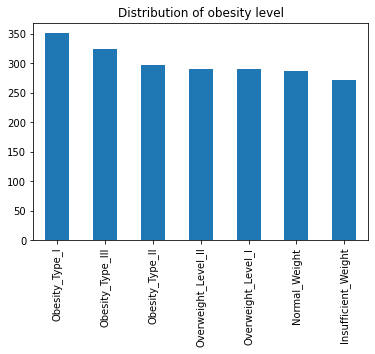

In [28]:
#visualizing the distribution of obesity levels
df_ex["NObeyesdad"].value_counts().plot(kind='bar', title='Distribution of obesity level')
plt.show()

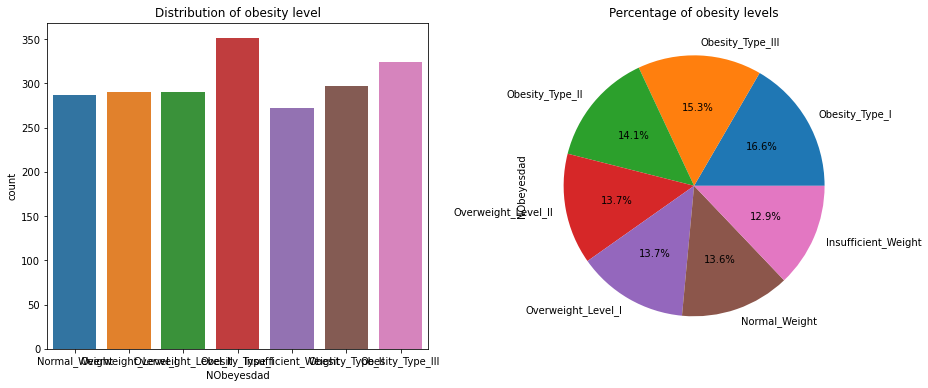

In [29]:
#最终考虑是否删除
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x="NObeyesdad", data=df_ex, ax=ax[0]).set(title='Distribution of obesity level')
_ = df_ex["NObeyesdad"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1], title="Percentage of obesity levels")

In [30]:
#Checking numerical variables in rows-string
print(df_ex.describe(include = [np.number]))

               Age       Height       Weight  Physical_activity_frequency
count  2111.000000  2111.000000  2111.000000                  2111.000000
mean     24.312600     1.701677    86.586058                     1.010298
std       6.345968     0.093305    26.191172                     0.850592
min      14.000000     1.450000    39.000000                     0.000000
25%      19.947192     1.630000    65.473343                     0.124505
50%      22.777890     1.700499    83.000000                     1.000000
75%      26.000000     1.768464   107.430682                     1.666678
max      61.000000     1.980000   173.000000                     3.000000


C:\Users\smile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


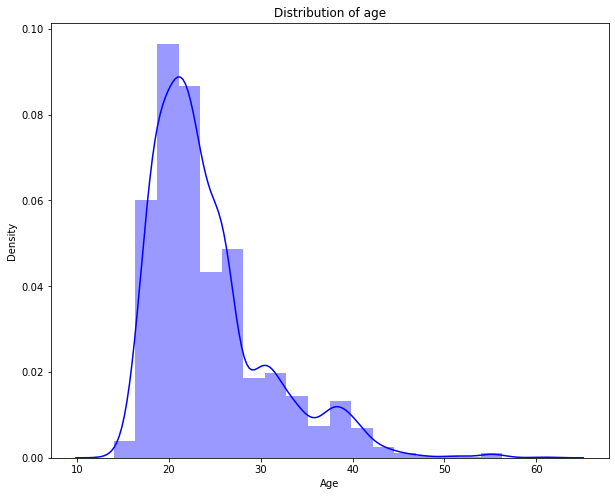

In [31]:
#visualizing the distribution of age
f2, ax2 = plt.subplots(figsize=(10,8))
x2 = df_ex["Age"]
ax2 = sns.distplot(x2, bins=20, color='blue')
ax2.set_title("Distribution of age")
plt.show()

C:\Users\smile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


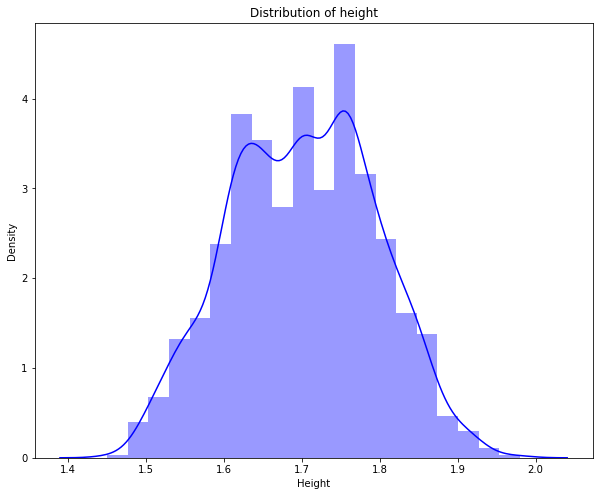

In [32]:
#visualizing the distribution of height
f2, ax2 = plt.subplots(figsize=(10,8))
x2 = df_ex["Height"]
ax2 = sns.distplot(x2, bins=20, color='blue')
ax2.set_title("Distribution of height")
plt.show()

C:\Users\smile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


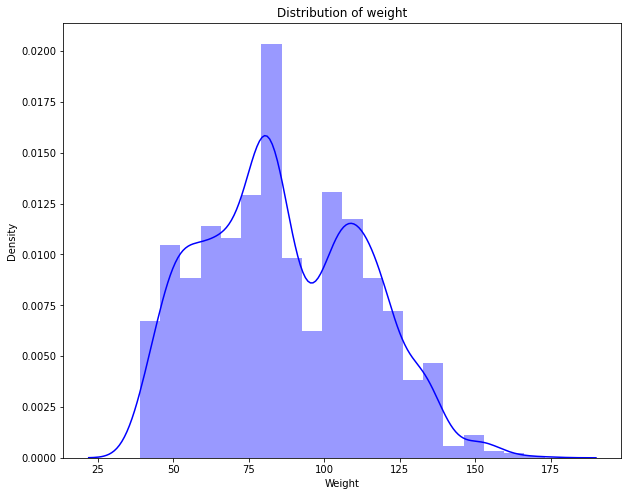

In [33]:
#visualizing the distribution of weight
f2, ax2 = plt.subplots(figsize=(10,8))
x2 = df_ex["Weight"]
ax2 = sns.distplot(x2, bins=20, color='blue')
ax2.set_title("Distribution of weight")
plt.show()

C:\Users\smile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


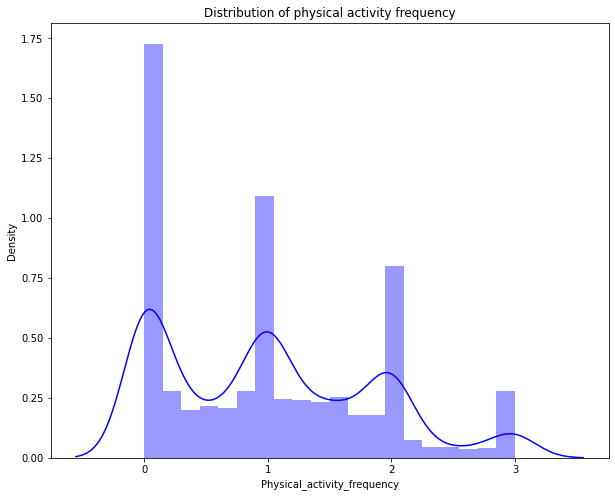

In [34]:
#visualizing the distribution of physical activity frequency
f2, ax2 = plt.subplots(figsize=(10,8))
x2 = df_ex["Physical_activity_frequency"]
ax2 = sns.distplot(x2, bins=20, color='blue')
ax2.set_title("Distribution of physical activity frequency")
plt.show()

<h3>2.2 Exploring the relationships between all pairs of columns (example 10 selected pairs of columns if the data set contains more than 10 attributes) by using appropriate descriptive statistics and/or graphical visualisations.</h3>

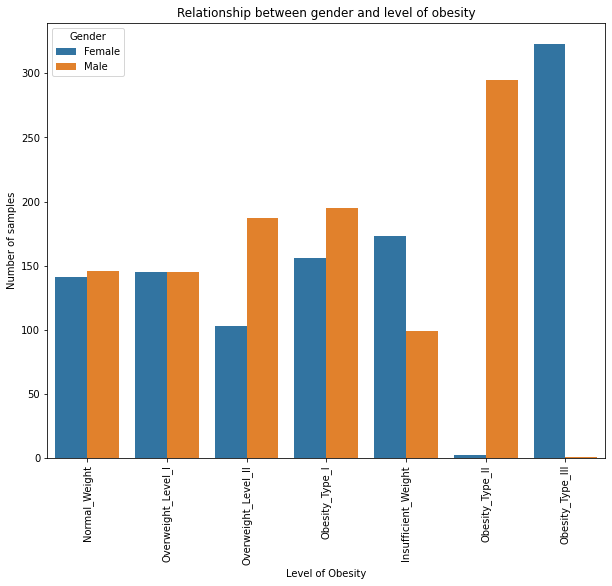

In [35]:
#Finding the relationship between gender and level of obesity
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='NObeyesdad', hue="Gender", data=df_ex)
ax.set_title("Relationship between gender and level of obesity")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel("Level of Obesity")
plt.ylabel("Number of samples")
plt.show()

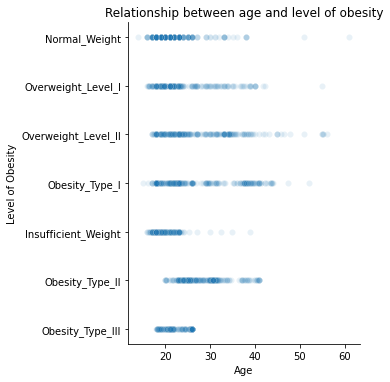

In [36]:
#Finding the relationship between age and level of obesity
sns.relplot(x='Age', y='NObeyesdad', kind="scatter", data=df_ex, alpha = 0.1).set(title='Relationship between age and level of obesity')
plt.xlabel("Age")
plt.ylabel("Level of Obesity")
plt.show()

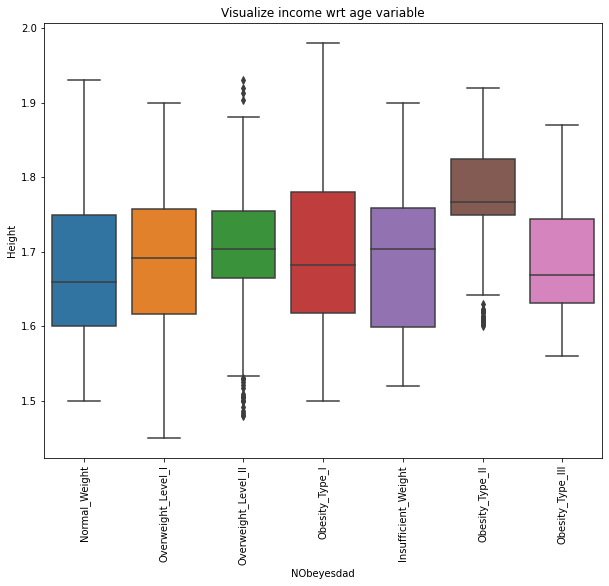

In [37]:
#relationship between height and level of obesity
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="NObeyesdad", y="Height", data=df_ex)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Visualize income wrt age variable")
plt.show()

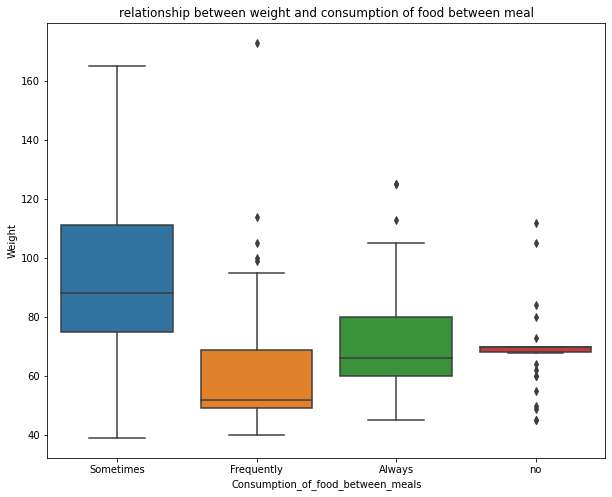

In [38]:
#relationship between weight and consumption of food between meals
plt.figure(figsize=(10,8))
sns.boxplot(x = "Consumption_of_food_between_meals", y="Weight", data = df_ex)
plt.title("relationship between weight and consumption of food between meal")
plt.show()

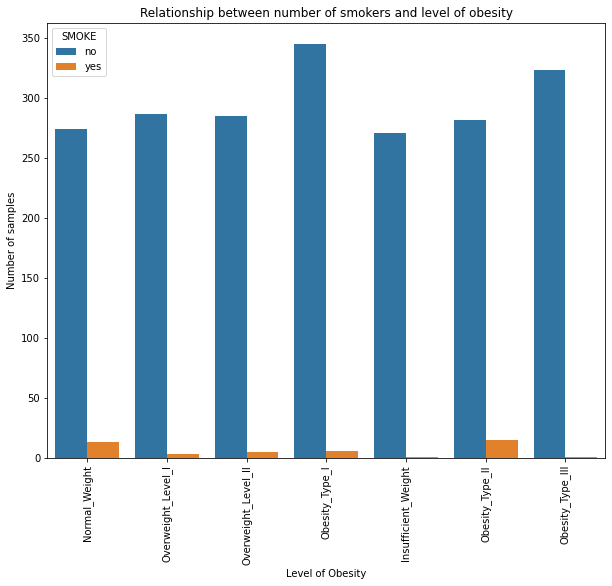

In [39]:
#Finding the relationship between number of smokers and level of obesity
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='NObeyesdad', hue="SMOKE", data=df_ex)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Relationship between number of smokers and level of obesity")
plt.xlabel("Level of Obesity")
plt.ylabel("Number of samples")
plt.show()

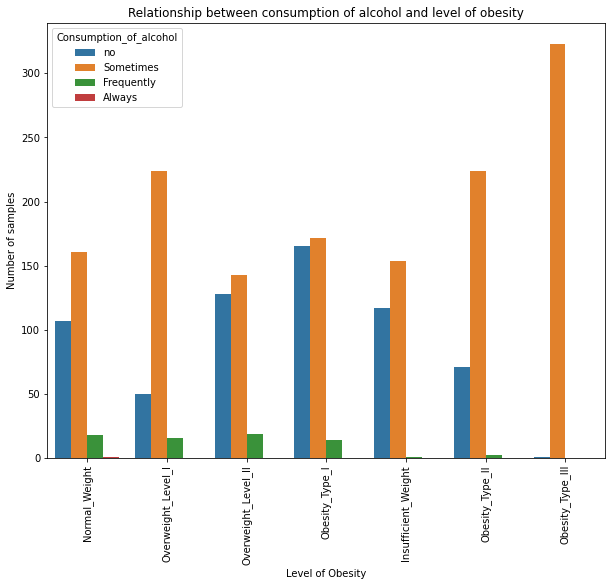

In [40]:
#Finding the relationship between consumption of alcohol and level of obesity
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='NObeyesdad', hue="Consumption_of_alcohol", data=df_ex)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Relationship between consumption of alcohol and level of obesity")
plt.xlabel("Level of Obesity")
plt.ylabel("Number of samples")
plt.show()

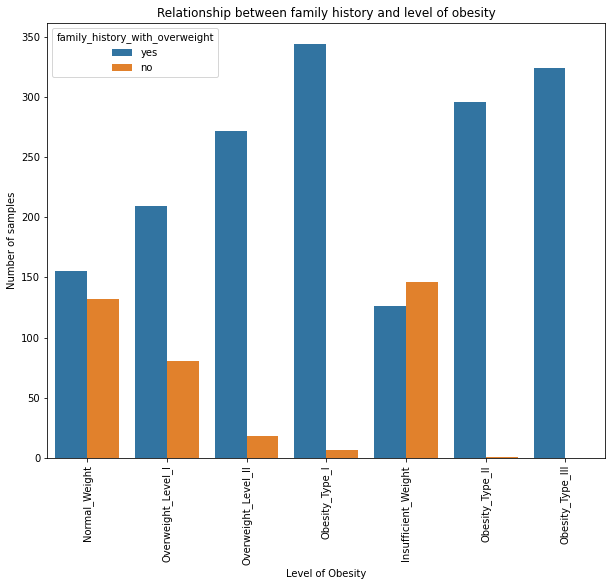

In [41]:
#Finding the relationship between family history and level of obesity
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='NObeyesdad', hue="family_history_with_overweight", data=df_ex)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Relationship between family history and level of obesity")
plt.xlabel("Level of Obesity")
plt.ylabel("Number of samples")
plt.show()

<h3>2.3 Posing one meaningful question and exploring the data by using appropriate methods to find its answer.</h3>
<p><strong>Compared with people who have food between meals, are people who doesn't have food between meals less like to be obese? Does the factor that family history with obesity has some influence on the result? </strong></p>

In [43]:
#filtering the dataset by targetting on people who do not have food between meals 
df_ex_q = df_ex[df_ex["Consumption_of_food_between_meals"] == "no"]
df_ex_q.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Consumption_of_food_between_meals,SMOKE,Physical_activity_frequency,Consumption_of_alcohol,NObeyesdad
44,Male,21.0,1.81,80.0,no,no,no,2.0,no,Normal_Weight
53,Female,23.0,1.63,55.0,yes,no,no,2.0,no,Normal_Weight
62,Male,22.0,1.67,62.0,no,no,no,0.0,Sometimes,Normal_Weight
68,Male,30.0,1.76,112.0,yes,no,yes,0.0,Frequently,Obesity_Type_II
69,Male,23.0,1.80,60.0,yes,no,no,0.0,Sometimes,Normal_Weight


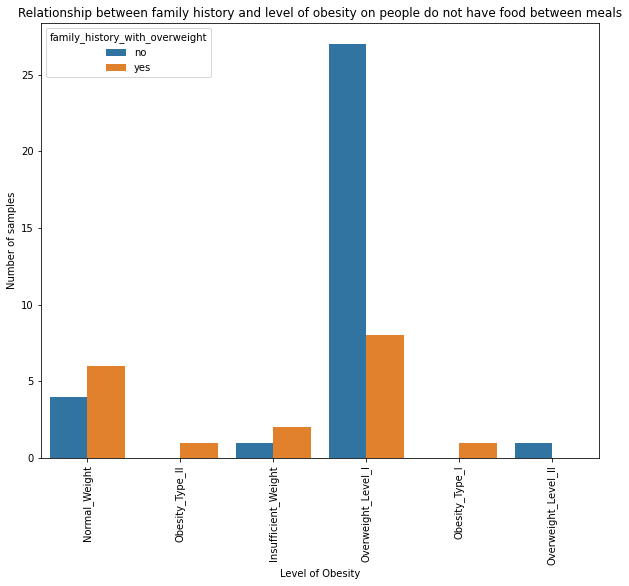

In [44]:
#Finding the relationship between number of smokers and level of obesity
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='NObeyesdad', hue="family_history_with_overweight", data=df_ex_q)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Relationship between family history and level of obesity on people do not have food between meals")
plt.xlabel("Level of Obesity")
plt.ylabel("Number of samples")
plt.show()

In [45]:
#filtering the dataset by targetting on people who have food between meals 
df_ex_q2 = df_ex[df_ex["Consumption_of_food_between_meals"] != "no"]
df_ex_q2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Consumption_of_food_between_meals,SMOKE,Physical_activity_frequency,Consumption_of_alcohol,NObeyesdad
0,Female,21.0,1.62,64.0,yes,Sometimes,no,0.0,no,Normal_Weight
1,Female,21.0,1.52,56.0,yes,Sometimes,yes,3.0,Sometimes,Normal_Weight
2,Male,23.0,1.80,77.0,yes,Sometimes,no,2.0,Frequently,Normal_Weight
3,Male,27.0,1.80,87.0,no,Sometimes,no,2.0,Frequently,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,Sometimes,no,0.0,Sometimes,Overweight_Level_II


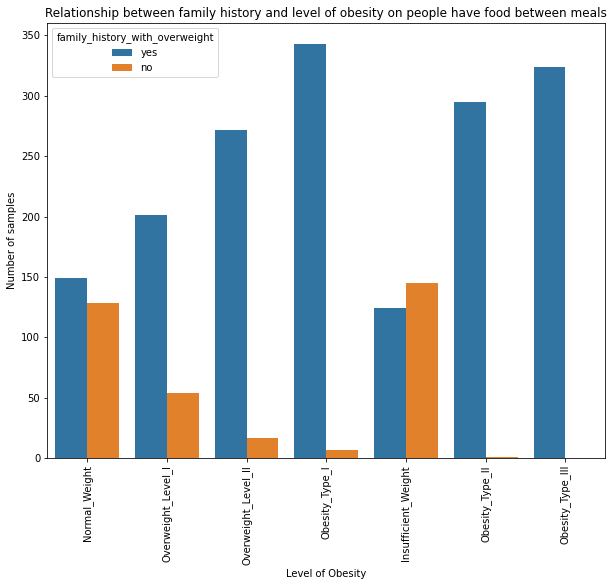

In [46]:
#Finding the relationship between number of smokers and level of obesity
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='NObeyesdad', hue="family_history_with_overweight", data=df_ex_q2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Relationship between family history and level of obesity on people have food between meals")
plt.xlabel("Level of Obesity")
plt.ylabel("Number of samples")
plt.show()

<h1>Task 3 – Data Modelling</h1>

<h3>3.1 Converting string to integers for classification </h3>
<p>According to the dataset details in "df_ex", the variables needs converstion are as follows:</p>
<li>Gender</li>
<li>family_history_with_overweight</li>
<li>Consumption_of_food_between_meals</li>
<li>SMOKE</li>
<li>Consumption_of_alcohol</li>
<li>NObeyesdad</li>


In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
for col in df_ex.columns:
    df_ex[col] = le.fit_transform(df_ex[col])
df_ex.head()

<ipython-input-47-818f2c29e31e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex[col] = le.fit_transform(df_ex[col])


,Gender,Age,Height,Weight,family_history_with_overweight,Consumption_of_food_between_meals,SMOKE,Physical_activity_frequency,Consumption_of_alcohol,NObeyesdad
0,0,404,295,245,1,2,0,0,3,1
1,0,404,28,173,1,2,1,1189,2,1
2,1,701,1306,382,1,2,0,1071,1,1
3,1,1021,1306,643,0,2,0,1071,1,5
4,1,578,1202,692,0,2,0,0,2,6


In [48]:
le.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [49]:
le.inverse_transform([0,1,2,3,4,5,6])

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [50]:
dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

{'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Obesity_Type_I': 2,
 'Obesity_Type_II': 3,
 'Obesity_Type_III': 4,
 'Overweight_Level_I': 5,
 'Overweight_Level_II': 6}

In [51]:
#saving the transformed dataset into .csv file
df_ex.to_csv("ObesityDataSet_raw_and_data_sinthetic_for_modelling.csv")

<h3>3.1 Splitting the data into a training set and a test set. </h3>
<p>• Suite1: 50% for training and 50% for testing</p>
<p>• Suite2: 60% for training and 40% for testing</p>
<p>• Suite3: 80% for training and 20% for testing</p>

In [52]:
#getting the feature matrix "X" and the target variable "y"
X = df_ex.iloc[:, 0:-1].values
y = df_ex.iloc[:, -1].values

In [53]:
# getting Suite1: 50% for training and 50% for testing
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.5, random_state=1)

# getting Suite2: 60% for training and 40% for testing
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.4, random_state=1)

# getting Suite3: 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [83]:
print(pd.DataFrame(X1_train))
print(pd.DataFrame(y1_train))

      0     1     2     3  4  5  6     7  8
0     0   701   775    98  1  1  0   907  3
1     0  1021    81   221  0  2  0   589  2
2     1  1029  1308  1267  1  2  0   385  2
3     0   285   974  1468  1  2  0   799  2
4     1   314  1306   256  0  1  0  1071  2
...  ..   ...   ...   ... .. .. ..   ... ..
1050  0    73   290   278  1  2  0   403  3
1051  1   335  1478   606  1  2  0   677  2
1052  0  1340   645   441  1  2  0     0  3
1053  0   186   652   317  1  3  0  1071  3
1054  1   732   863   539  1  2  0   589  2

[1055 rows x 9 columns]
      0
0     0
1     5
2     3
3     4
4     1
...  ..
1050  5
1051  5
1052  6
1053  1
1054  6

[1055 rows x 1 columns]


In [84]:
print(pd.DataFrame(X1_test))
print(pd.DataFrame(y1_test))

      0     1     2     3  4  5  6     7  8
0     1     9  1011    90  0  2  0  1014  2
1     1    22   927   173  1  2  0  1071  3
2     1   578   197   267  0  2  0  1189  3
3     0   982   420  1100  1  2  0     0  2
4     1  1141  1199  1304  1  2  0   242  2
...  ..   ...   ...   ... .. .. ..   ... ..
1051  1   314  1573  1365  1  0  0   589  2
1052  0   341  1195  1481  1  2  0   892  2
1053  0    75   738   101  0  2  0     0  2
1054  1   475   772   751  1  2  0     0  3
1055  0   843   105    55  0  2  0     0  2

[1056 rows x 9 columns]
      0
0     0
1     1
2     5
3     4
4     3
...  ..
1051  2
1052  4
1053  0
1054  2
1055  1

[1056 rows x 1 columns]


<h3>3.2 Application of the KNN classification method</h3>

<p>3.2.1 Selecting appropriate model parameters and using them to train the model via the KNN classification method.</p>

<p><strong>(1)finding the best value of n_neighbor</strong></p>

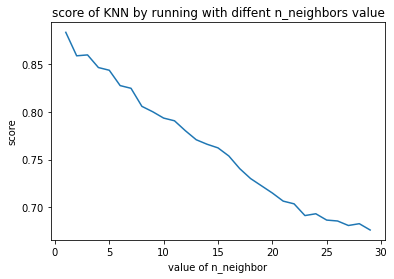

In [55]:
#finding the best value of n_neighbor with visualization tool,starting with Suite1
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for each in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(X1_train,y1_train)
    score_list.append(knn.score(X1_test,y1_test))

plt.plot(range(1,30),score_list)
plt.xlabel("value of n_neighbor")
plt.ylabel("score")
plt.title("score of KNN by running with diffent n_neighbors value")
plt.show()

In [56]:
#double checking the best value of n_neighbor
from sklearn.model_selection import cross_val_score
neighbors_suite1 = list(range(1,30,2))
cv_scores_suite1 = []
for k in neighbors_suite1:
    knn_suite1 = KNeighborsClassifier(n_neighbors = k)
    scores_suite1 = cross_val_score(knn_suite1, X1_train, y1_train, cv=2,scoring='accuracy')
    cv_scores_suite1.append(scores_suite1.mean()) 
k_best_suite1 = neighbors_suite1[np.argmax(cv_scores_suite1)] 
print("cv_scores for suite1:", cv_scores_suite1) 
print("k_best for suite1:",k_best_suite1)

cv_scores for suite1: [0.828425981829682, 0.7639763383359208, 0.7241694698407222, 0.7127986458513024, 0.6805639411189696, 0.6786700017250302, 0.6720358231269047, 0.6549777902363292, 0.6578151055143464, 0.6492815968029441, 0.6436015755275717, 0.6436141538726927, 0.6294024207923639, 0.6246567908688402, 0.6028459404289574]
k_best for suite1: 1


<p><strong>Summary: for suite1, the best value of n_neighbor is 1</strong></p>

In [57]:
#finding the best value of n_neighbor for Suite2
from sklearn.model_selection import cross_val_score
neighbors_suite2 = list(range(1,30,2))
cv_scores_suite2 = []
for k in neighbors_suite2:
    knn_suite2 = KNeighborsClassifier(n_neighbors = k)
    scores_suite2 = cross_val_score(knn_suite2, X2_train, y2_train, cv=2,scoring='accuracy')
    cv_scores_suite2.append(scores_suite2.mean()) 
k_best_suite2 = neighbors_suite2[np.argmax(cv_scores_suite2)] 
print("cv_scores for suite2:", cv_scores_suite2) 
print("k_best for suite2:",k_best_suite2)

cv_scores for suite2: [0.839652448657188, 0.782780410742496, 0.7472353870458136, 0.7148499210110585, 0.69826224328594, 0.684044233807267, 0.6721958925750395, 0.6674565560821485, 0.6619273301737756, 0.6595576619273302, 0.6453396524486572, 0.6334913112164298, 0.631911532385466, 0.6295418641390205, 0.6184834123222749]
k_best for suite2: 1


In [58]:
#finding the best value of n_neighbor for Suite3
from sklearn.model_selection import cross_val_score
neighbors_suite3 = list(range(1,30,2))
cv_scores_suite3 = []
for k in neighbors_suite3:
    knn_suite3 = KNeighborsClassifier(n_neighbors = k)
    scores_suite3 = cross_val_score(knn_suite3, X3_train, y3_train, cv=2,scoring='accuracy')
    cv_scores_suite3.append(scores_suite3.mean()) 
k_best_suite3 = neighbors_suite3[np.argmax(cv_scores_suite3)] 
print("cv_scores for suite3:", cv_scores_suite3) 
print("k_best for suite3:",k_best_suite3)

cv_scores for suite3: [0.8678909952606635, 0.832345971563981, 0.8009478672985781, 0.7962085308056872, 0.7683649289099526, 0.7511848341232228, 0.7351895734597156, 0.7180094786729858, 0.7049763033175356, 0.7002369668246445, 0.6877962085308056, 0.6842417061611374, 0.6800947867298578, 0.6771327014218009, 0.6670616113744077]
k_best for suite3: 1


<p><strong>Summary: <strong></p>
<p><strong>For suite2 and 3, the best value of n_neighbor is also 1, which makes 1 the best values of n_neighbor for all suite3. Thus, n_neighbors=1 will be used for the following modelling.</strong></p>

<p>3.2.2 Evaluating the performances of the model on the training and test sets, respectively, in terms of</p>
<p>o Confusion matrix</p>
<p>o Classification accuracy</p>
<p>o Precision</p>
<p>o Recall</p>
<p>o F1 score.</p>

<p><strong>(1)Confusion matrix</strong></p>

In [59]:
#using n_neighbors=1 on the training set 
from sklearn.metrics import confusion_matrix

knn1 = KNeighborsClassifier(n_neighbors=1) 

knn1_trained_suit1 = knn1.fit(X1_train, y1_train)  #for Suite1
y1_test_pred = knn1_trained_suit1.predict(X1_test)

knn1_trained_suit2 = knn1.fit(X2_train, y2_train)  #for Suite2
y2_test_pred = knn1_trained_suit2.predict(X2_test)

knn1_trained_suit3 = knn1.fit(X3_train, y3_train)  #for Suite3
y3_test_pred = knn1_trained_suit3.predict(X3_test)

In [60]:
confusion_matrix(y1_test, y1_test_pred) #for Suite1

array([[133,  12,   0,   0,   0,   1,   0],
       [ 10,  98,   0,   0,   0,  30,   1],
       [  0,   0, 173,   3,   1,   1,  10],
       [  0,   0,   1, 143,   2,   0,   0],
       [  0,   0,   0,   1, 154,   0,   0],
       [  0,  12,   0,   0,   0, 119,  11],
       [  0,   8,   1,   0,   0,  18, 113]], dtype=int64)

In [61]:
confusion_matrix(y2_test, y2_test_pred) #for Suite2

array([[105,  11,   0,   0,   0,   0,   0],
       [  9,  84,   0,   0,   0,  18,   0],
       [  0,   0, 141,   0,   0,   0,   3],
       [  0,   0,   1, 115,   2,   0,   0],
       [  0,   0,   0,   0, 121,   0,   0],
       [  0,   7,   0,   0,   0, 102,   7],
       [  0,   5,   2,   0,   0,  17,  95]], dtype=int64)

In [62]:
confusion_matrix(y3_test, y3_test_pred) #for Suite3

array([[56,  5,  0,  0,  0,  0,  0],
       [ 2, 36,  0,  0,  0,  6,  1],
       [ 0,  0, 76,  0,  0,  0,  3],
       [ 0,  0,  1, 53,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  2,  0,  0,  0, 56,  3],
       [ 0,  0,  2,  0,  0,  5, 53]], dtype=int64)

<p><strong>(2)Classification accuracy</strong></p>

In [63]:
from sklearn.metrics import accuracy_score 
acc_suite1 = accuracy_score(y1_test, y1_test_pred) #for Suite1
acc_suite2 = accuracy_score(y2_test, y2_test_pred) #for Suite2
acc_suite3 = accuracy_score(y3_test, y3_test_pred) #for Suite2

print("Suite1's accuracy score is:", acc_suite1) 
print("Suite2's accuracy is:", acc_suite2) 
print("Suite3's accuracy is:", acc_suite3) 

Suite1's accuracy score is: 0.8835227272727273
Suite2's accuracy is: 0.9029585798816568
Suite3's accuracy is: 0.9290780141843972


<p><strong>(3)Precision</strong></p>

In [64]:
from sklearn.metrics import precision_score
pre_suite1 = precision_score(y1_test, y1_test_pred, average="macro") #for Suite1
pre_suite2 = precision_score(y2_test, y2_test_pred, average="macro") #for Suite2
pre_suite3 = precision_score(y3_test, y3_test_pred, average="macro") #for Suite3

print("Suite1's precision score is:", pre_suite1) 
print("Suite2's precision score is:", pre_suite2) 
print("Suite3's precision score is:", pre_suite3) 

Suite1's precision score is: 0.8810496281071929
Suite2's precision score is: 0.9026133309747302
Suite3's precision score is: 0.9262722984309014


<p><strong>(4)Recall</strong></p>

In [65]:
from sklearn.metrics import recall_score
rec_suite1 = recall_score(y1_test, y1_test_pred, average="macro") #for Suite1
rec_suite2 = recall_score(y2_test, y2_test_pred, average="macro") #for Suite2
rec_suite3 = recall_score(y3_test, y3_test_pred, average="macro") #for Suite3

print("Suite1's recall score is:", rec_suite1) 
print("Suite2's recall score is:", rec_suite2) 
print("Suite3's recall score is:", rec_suite3) 

Suite1's recall score is: 0.8791970156197563
Suite2's recall score is: 0.8990431115659494
Suite3's recall score is: 0.9232722435772861


<p><strong>(5)F1 score</strong></p>

In [66]:
from sklearn.metrics import f1_score
f1_suite1 = f1_score(y1_test, y1_test_pred, average="macro") #for Suite1
f1_suite2 = f1_score(y2_test, y2_test_pred, average="macro") #for Suite2
f1_suite3 = f1_score(y3_test, y3_test_pred, average="macro") #for Suite3

print("Suite1's F1 score is:", f1_suite1) 
print("Suite2's F1 score is:", f1_suite2) 
print("Suite3's F1 score is:", f1_suite3) 

Suite1's F1 score is: 0.8789411428883508
Suite2's F1 score is: 0.8994740693366369
Suite3's F1 score is: 0.9243387348809371


<p><strong>(6)getting classification report</strong></p>

In [67]:
from sklearn.metrics import classification_report
print("classification report of Suite1")
print(classification_report(y1_test, y1_test_pred)) #for Suite1

print("classification report of Suite2")
print(classification_report(y2_test, y2_test_pred)) #for Suite2

print("classification report of Suite3")
print(classification_report(y3_test, y3_test_pred)) #for Suite3

classification report of Suite1
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       146
           1       0.75      0.71      0.73       139
           2       0.99      0.92      0.95       188
           3       0.97      0.98      0.98       146
           4       0.98      0.99      0.99       155
           5       0.70      0.84      0.77       142
           6       0.84      0.81      0.82       140

    accuracy                           0.88      1056
   macro avg       0.88      0.88      0.88      1056
weighted avg       0.89      0.88      0.88      1056

classification report of Suite2
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       116
           1       0.79      0.76      0.77       111
           2       0.98      0.98      0.98       144
           3       1.00      0.97      0.99       118
           4       0.98      1.00      0.99       121
           5  

<h3>3.3 Application of the Random Forest Classifier</h3>

<p>3.3.1 Selecting appropriate model parameters and using them to train the model via the Random Forest Classifier.</p>

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, n_estimators=50)

rfc_trained_suit1 = rfc.fit(X1_train, y1_train) #for Suite1
y1_test_pred_rfc = rfc_trained_suit1.predict(X1_test) 

rfc_trained_suit2 = rfc.fit(X2_train, y2_train) #for Suite2
y2_test_pred_rfc = rfc_trained_suit2.predict(X2_test) 

rfc_trained_suit3 = rfc.fit(X3_train, y3_train) #for Suite3
y3_test_pred_rfc = rfc_trained_suit3.predict(X3_test) 

<p>3.3.2 Evaluating the performances of the model on the training and test sets, respectively, in terms of</p>
<p>o Confusion matrix</p>
<p>o Classification accuracy</p>
<p>o Precision</p>
<p>o Recall</p>
<p>o F1 score.</p>

<p><strong>(1)Confusion matrix</strong></p>

In [69]:
confusion_matrix(y1_test, y1_test_pred_rfc)  #for Suite1

array([[139,   7,   0,   0,   0,   0,   0],
       [  8, 120,   0,   0,   0,  10,   1],
       [  0,   1, 180,   1,   0,   1,   5],
       [  0,   1,   0, 144,   1,   0,   0],
       [  0,   0,   0,   0, 155,   0,   0],
       [  0,   9,   0,   0,   0, 122,  11],
       [  0,   1,   3,   0,   0,   5, 131]], dtype=int64)

In [70]:
confusion_matrix(y2_test, y2_test_pred_rfc)  #for Suite2

array([[111,   5,   0,   0,   0,   0,   0],
       [  5,  99,   0,   0,   0,   7,   0],
       [  0,   0, 135,   1,   0,   1,   7],
       [  0,   0,   1, 116,   1,   0,   0],
       [  0,   0,   0,   0, 121,   0,   0],
       [  0,   7,   0,   0,   0, 104,   5],
       [  0,   3,   5,   0,   0,   3, 108]], dtype=int64)

In [71]:
confusion_matrix(y3_test, y3_test_pred_rfc)  #for Suite3

array([[59,  2,  0,  0,  0,  0,  0],
       [ 2, 41,  0,  0,  0,  2,  0],
       [ 0,  0, 73,  2,  0,  0,  4],
       [ 0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  4,  0,  0,  0, 53,  4],
       [ 0,  3,  2,  0,  0,  1, 54]], dtype=int64)

<p><strong>(2)Classification accuracy</strong></p>

In [72]:
rfc_acc_suite1 = accuracy_score(y1_test, y1_test_pred_rfc) #for Suite1
rfc_acc_suite2 = accuracy_score(y2_test, y2_test_pred_rfc) #for Suite2
rfc_acc_suite3 = accuracy_score(y3_test, y3_test_pred_rfc) #for Suite2

print("Suite1's accuracy score is:", rfc_acc_suite1) 
print("Suite2's accuracy is:", rfc_acc_suite2) 
print("Suite3's accuracy is:", rfc_acc_suite3) 

Suite1's accuracy score is: 0.9384469696969697
Suite2's accuracy is: 0.9396449704142011
Suite3's accuracy is: 0.9385342789598109


<p><strong>(3)Precision</strong></p>

In [73]:
rfc_pre_suite1 = precision_score(y1_test, y1_test_pred_rfc, average="macro") #for Suite1
rfc_pre_suite2 = precision_score(y2_test, y2_test_pred_rfc, average="macro") #for Suite2
rfc_pre_suite3 = precision_score(y3_test, y3_test_pred_rfc, average="macro") #for Suite3

print("Suite1's precision score is:", rfc_pre_suite1) 
print("Suite2's precision score is:", rfc_pre_suite2) 
print("Suite3's precision score is:", rfc_pre_suite3) 

Suite1's precision score is: 0.9354829198861123
Suite2's precision score is: 0.9386240727278325
Suite3's precision score is: 0.9346040679624573


<p><strong>(4)Recall</strong></p>

In [74]:
rfc_rec_suite1 = recall_score(y1_test, y1_test_pred_rfc, average="macro") #for Suite1
rfc_rec_suite2 = recall_score(y2_test, y2_test_pred_rfc, average="macro") #for Suite2
rfc_rec_suite3 = recall_score(y3_test, y3_test_pred_rfc, average="macro") #for Suite3

print("Suite1's recall score is:", rfc_rec_suite1) 
print("Suite2's recall score is:", rfc_rec_suite2) 
print("Suite3's recall score is:", rfc_rec_suite3) 

Suite1's recall score is: 0.9362830772434195
Suite2's recall score is: 0.9390648629173819
Suite3's recall score is: 0.9387467596847137


<p><strong>(5)F1 score</strong></p>

In [75]:
rfc_f1_suite1 = f1_score(y1_test, y1_test_pred_rfc, average="macro") #for Suite1
rfc_f1_suite2 = f1_score(y2_test, y2_test_pred_rfc, average="macro") #for Suite2
rfc_f1_suite3 = f1_score(y3_test, y3_test_pred_rfc, average="macro") #for Suite3

print("Suite1's F1 score is:", rfc_f1_suite1) 
print("Suite2's F1 score is:", rfc_f1_suite2) 
print("Suite3's F1 score is:", rfc_f1_suite3) 

Suite1's F1 score is: 0.9357273283997406
Suite2's F1 score is: 0.9387974828288544
Suite3's F1 score is: 0.9359242781404744


<p><strong>(6)getting classification report</strong></p>

In [76]:
print("classification report of Suite1")
print(classification_report(y1_test, y1_test_pred_rfc)) #for Suite1

print("classification report of Suite2")
print(classification_report(y2_test, y2_test_pred_rfc)) #for Suite2

print("classification report of Suite3")
print(classification_report(y3_test, y3_test_pred_rfc)) #for Suite3

classification report of Suite1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       146
           1       0.86      0.86      0.86       139
           2       0.98      0.96      0.97       188
           3       0.99      0.99      0.99       146
           4       0.99      1.00      1.00       155
           5       0.88      0.86      0.87       142
           6       0.89      0.94      0.91       140

    accuracy                           0.94      1056
   macro avg       0.94      0.94      0.94      1056
weighted avg       0.94      0.94      0.94      1056

classification report of Suite2
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       116
           1       0.87      0.89      0.88       111
           2       0.96      0.94      0.95       144
           3       0.99      0.98      0.99       118
           4       0.99      1.00      1.00       121
           5  

<h3>3.4 Comparing the two chosen models via appropriate graphical visualisations based upon the above evaluation results.</h3>

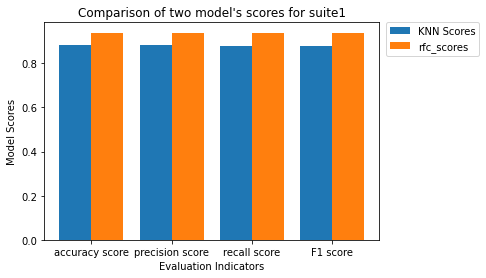

In [77]:
evaluation_indicator = ["accuracy score", "precision score", "recall score", "F1 score"]
knn_scores_suite1 = [acc_suite1, pre_suite1, rec_suite1, f1_suite1] #for Suite1
rfc_scores_suite1 = [rfc_acc_suite1, rfc_pre_suite1, rfc_rec_suite1, rfc_f1_suite1]

x_axis = np.arange(len(evaluation_indicator))

plt.bar(x_axis - 0.2, knn_scores_suite1, 0.4, label = "KNN Scores")
plt.bar(x_axis + 0.2, rfc_scores_suite1, 0.4, label = "rfc_scores")

plt.xticks(x_axis, evaluation_indicator)
plt.xlabel("Evaluation Indicators")
plt.ylabel("Model Scores")
plt.title("Comparison of two model's scores for suite1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

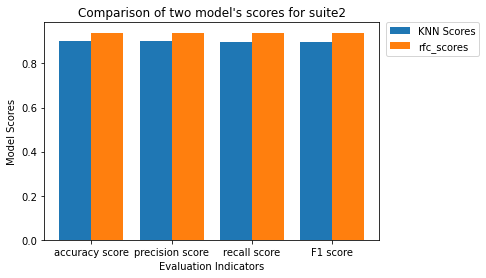

In [78]:
evaluation_indicator = ["accuracy score", "precision score", "recall score", "F1 score"]
knn_scores_suite2 = [acc_suite2, pre_suite2, rec_suite2, f1_suite2] #for Suite2
rfc_scores_suite2 = [rfc_acc_suite2, rfc_pre_suite2, rfc_rec_suite2, rfc_f1_suite2]

x_axis = np.arange(len(evaluation_indicator))

plt.bar(x_axis - 0.2, knn_scores_suite2, 0.4, label = "KNN Scores")
plt.bar(x_axis + 0.2, rfc_scores_suite2, 0.4, label = "rfc_scores")

plt.xticks(x_axis, evaluation_indicator)
plt.xlabel("Evaluation Indicators")
plt.ylabel("Model Scores")
plt.title("Comparison of two model's scores for suite2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

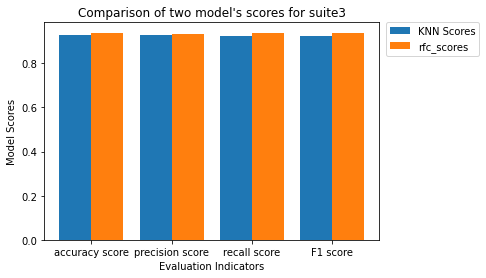

In [79]:
evaluation_indicator = ["accuracy score", "precision score", "recall score", "F1 score"]
knn_scores_suite3 = [acc_suite3, pre_suite3, rec_suite3, f1_suite3] #for Suite3
rfc_scores_suite3 = [rfc_acc_suite3, rfc_pre_suite3, rfc_rec_suite3, rfc_f1_suite3]

x_axis = np.arange(len(evaluation_indicator))

plt.bar(x_axis - 0.2, knn_scores_suite3, 0.4, label = "KNN Scores")
plt.bar(x_axis + 0.2, rfc_scores_suite3, 0.4, label = "rfc_scores")

plt.xticks(x_axis, evaluation_indicator)
plt.xlabel("Evaluation Indicators")
plt.ylabel("Model Scores")
plt.title("Comparison of two model's scores for suite3")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

<p><strong>Summary:</strong></p>
<li>Random Forest Classifier works better than KNN on suite1 and suite2, while on suite3 who has 80% data for training and 20% data for testing, there is no obvious difference between the two classification models.</li>
<li>All scores are around 90, indicating that both classification algorithms work well on the data classification.</li>